In [1]:
import pandas as pd
import numpy as np
from functools import reduce
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

C:\Users\jeffr\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\jeffr\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [70]:
student_info = pd.read_csv("C:/Users/jeffr/Downloads/anonymisedData/studentInfo.csv")
assessments = pd.read_csv("C:/Users/jeffr/Downloads/anonymisedData/assessments.csv")
student_assessment = pd.read_csv("C:/Users/jeffr/Downloads/anonymisedData/studentAssessment.csv")
courses = pd.read_csv("C:/Users/jeffr/Downloads/anonymisedData/courses.csv")
student_registration = pd.read_csv("C:/Users/jeffr/Downloads/anonymisedData/studentRegistration.csv")
student_vle = pd.read_csv("C:/Users/jeffr/Downloads/anonymisedData/studentVle.csv")
vle = pd.read_csv("C:/Users/jeffr/Downloads/anonymisedData/vle.csv")

In [64]:
student_assessment.dropna(inplace=True)
student_info.dropna(inplace=True)
student_registration.dropna(inplace=True)
student_VLE.dropna(inplace=True)

NameError: name 'student_assessment' is not defined

In [4]:
combined = [studentAssessment, studentInfo, studentRegistration, studentVLE]
df_combined = reduce(lambda left,right: pd.merge(left,right,on='id_student'), combined)
df_combined['final_result'].value_counts()

Withdrawn      16697024
Pass            6924889
Fail            2169591
Distinction     1149815
Name: final_result, dtype: int64

In [5]:
test2=df_combined.groupby('id_student')[['sum_click']].sum()

In [6]:
table = [studentInfo, test2]
table2 = reduce(lambda left,right: pd.merge(left,right,on='id_student'), table)
table2['final_result'].value_counts()

Withdrawn      5295
Pass            784
Fail            557
Distinction     119
Name: final_result, dtype: int64

In [7]:
le = preprocessing.LabelEncoder()
df_final = table2.apply(le.fit_transform)

In [8]:
df_final.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_click
0,0,1,59,0,0,0,7,0,0,4,0,3,885
1,0,3,59,0,0,0,7,0,1,4,0,1,885
2,0,1,102,1,8,2,7,1,0,4,0,3,2236
3,0,3,102,1,8,2,7,1,1,4,0,2,2236
4,0,1,116,1,8,1,8,1,0,4,0,3,880


In [9]:
is1=df_final['code_presentation']==1

In [10]:
print(is1.head())

0     True
1    False
2     True
3    False
4     True
Name: code_presentation, dtype: bool


In [11]:
df_final1=df_final[is1]

In [12]:
is2=df_final['code_presentation']==2
is3=df_final['code_presentation']==3
is4=df_final['code_presentation']==4

In [13]:
df_final2=df_final[is2]
df_final3=df_final[is3]
df_final4=df_final[is4]

In [14]:
proj=pd.concat([df_final1,df_final2,df_final3,df_final4])
# I probably am doing something wrong here, I got all the tables to have one row representing one student on one module
# then added all the modules together

In [15]:
proj.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_click
0,0,1,59,0,0,0,7,0,0,4,0,3,885
2,0,1,102,1,8,2,7,1,0,4,0,3,2236
4,0,1,116,1,8,1,8,1,0,4,0,3,880
5,0,1,160,1,11,0,5,0,0,4,0,3,2798
7,0,1,173,0,7,2,9,1,0,4,1,3,1923


In [16]:
proj2=proj.drop(columns="sum_click")

In [22]:
# Decision Tree for Table with sum_click

X = proj.loc[:, proj.columns != 'final_result']
y = proj['final_result']
xTrain, xTest, yTrain, yTest = train_test_split(X, y,train_size = 0.75)

dt = tree.DecisionTreeClassifier(criterion='gini')
dt = dt.fit(xTrain, yTrain)
train_pred = dt.predict(xTrain)
test_pred = dt.predict(xTest)
print("Accuracy:{0:.3f}".format(metrics.accuracy_score(yTest, test_pred)),"\n")

Accuracy:0.721 



C:\Users\jeffr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [23]:
# Decision Tree for Table without sum_click

X = proj2.loc[:, proj2.columns != 'final_result']
y = proj2['final_result']
xTrain, xTest, yTrain, yTest = train_test_split(X, y,train_size = 0.75)

dt = tree.DecisionTreeClassifier(criterion='gini')
dt = dt.fit(xTrain, yTrain)
train_pred = dt.predict(xTrain)
test_pred = dt.predict(xTest)
print("Accuracy:{0:.3f}".format(metrics.accuracy_score(yTest, test_pred)),"\n")

Accuracy:0.683 



In [25]:
# Random Forest for Table without sum_click
X = proj2.loc[:, proj2.columns != 'final_result']
y = proj2['final_result']
xTrain, xTest, yTrain, yTest = train_test_split(X, y,train_size = 0.75)

rf = RandomForestClassifier(n_estimators=10,random_state=33)
rf = rf.fit(xTrain, yTrain)
train_pred = rf.predict(xTrain)
test_pred = rf.predict(xTest)
print("Accuracy:{0:.3f}".format(metrics.accuracy_score(yTest, test_pred)),"\n")

Accuracy:0.742 



In [ ]:
# Random Forest for Table with sum_click
X = proj.loc[:, proj.columns != 'final_result']
y = proj['final_result']
xTrain, xTest, yTrain, yTest = train_test_split(X, y,train_size = 0.75)

rf = RandomForestClassifier(n_estimators=10,random_state=33)
rf = rf.fit(xTrain, yTrain)
train_pred = rf.predict(xTrain)
test_pred = rf.predict(xTest)
print("Accuracy:{0:.3f}".format(metrics.accuracy_score(yTest, test_pred)),"\n")

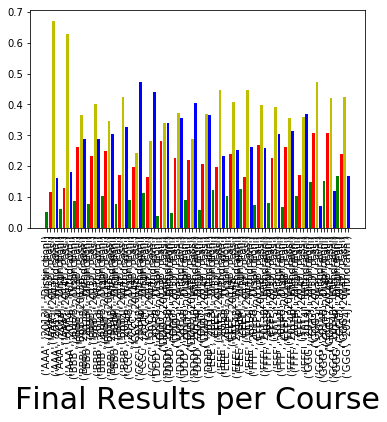

In [86]:
course_pres_count = studentInfo[['code_module', 'code_presentation', 'final_result']].\
                 groupby(['code_module', 'code_presentation', 'final_result'], as_index=False)['final_result'].size()

rates = course_pres_count / course_pres_count.groupby(level=[0,1]).transform(sum)
cpc = range(len(rates))
plt.xticks(cpc, rates.index, rotation='vertical')
p5 = plt.bar(cpc, rates, align='center', color = 'gryb')
plt.xlabel('Final Results per Course', fontsize=30)
plt.show()

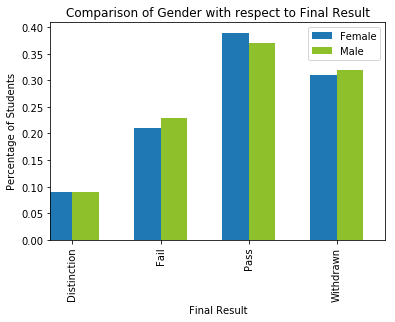

In [48]:
gender = studentInfo.groupby(['gender'],as_index = False)
gender_count = gender['id_student'].count()
result_gender = studentInfo.groupby(['gender', 'final_result'],as_index = False)
result_gender_count = result_gender['id_student'].count()

merge = pd.merge(gender_count, result_gender_count, on = 'gender', how = 'left')
merge['i'] = round((merge['id_student_y']/merge['id_student_x']), 2)
merge = merge[['gender','final_result', 'i']]

female = merge.loc[merge['gender'] == 'F']
male = merge.loc[merge['gender'] == 'M']

fig = plt.figure() 

ax = fig.add_subplot(111) 

female.set_index('final_result',drop=True,inplace=True)
male.set_index('final_result',drop=True,inplace=True)
female.plot(kind='bar', ax=ax, width= 0.3, position=1)
male.plot(kind='bar', color='#8dc02b', ax=ax, width= 0.3, position=0)

plt.xlabel('Final Result')
plt.ylabel('Percentage of Students')
plt.title('Comparison of Gender with respect to Final Result')
plt.legend(['Female', 'Male'])
plt.show()

In [55]:
proj

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_click
0,0,1,59,0,0,0,7,0,0,4,0,3,885
2,0,1,102,1,8,2,7,1,0,4,0,3,2236
4,0,1,116,1,8,1,8,1,0,4,0,3,880
5,0,1,160,1,11,0,5,0,0,4,0,3,2798
7,0,1,173,0,7,2,9,1,0,4,1,3,1923
9,0,1,183,1,9,0,9,0,0,38,0,3,1951
11,0,1,193,0,4,2,8,0,0,9,0,3,142
12,0,1,195,0,5,0,3,1,0,4,1,3,2915
14,0,1,207,0,0,2,7,0,0,4,0,3,2733
16,0,1,214,1,1,0,4,1,0,4,0,3,2760


In [28]:
df3 = proj[['id_student','sum_click','final_result']]

In [29]:
df3

,id_student,sum_click,final_result
0,59,885,3
2,102,2236,3
4,116,880,3
5,160,2798,3
7,173,1923,3
9,183,1951,3
11,193,142,3
12,195,2915,3
14,207,2733,3
16,214,2760,3


In [33]:
check=df3['id_student']==102

In [34]:
df3[check]

,id_student,sum_click,final_result
2,102,2236,3
3,102,2236,2


In [30]:
df3.tail()

,id_student,sum_click,final_result
6750,4350,210,3
6751,4355,1206,3
6752,4413,108,3
6753,4419,106,3
6754,4634,440,3


In [70]:
df3.head()

,id_student,code_presentation,sum_click,final_result
0,59,1,885,3
2,102,1,2236,3
4,116,1,880,3
5,160,1,2798,3
7,173,1,1923,3


In [16]:
df['color'] = np.where(df['Set']=='Z', 'green', 'red')

NameError: name 'df' is not defined

In [46]:
table2['final']= np.where(table2['final_result']=='Withdrawn', 1, 0)

In [47]:
table2


,id_student,final_result,sum_click,final
0,65002,Withdrawn,1408,1
1,65002,Fail,1408,0
2,94961,Withdrawn,14880,1
3,94961,Pass,14880,0
4,106247,Withdrawn,1395,1
5,129955,Withdrawn,45312,1
6,129955,Withdrawn,45312,1
7,135400,Withdrawn,8540,1
8,135400,Pass,8540,0
9,141377,Withdrawn,9072,1


In [12]:
test3=test2.drop(columns="code_module")

KeyError: "['code_module'] not found in axis"

In [13]:
test2

,sum_click
id_student,
8462,18368
24213,27888
25261,997
25572,226
25997,26
27417,16320
27891,8352
28952,210
29411,21060


In [15]:
table2

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_click
0,AAA,2013J,65002,F,East Anglian Region,A Level or Equivalent,70-80%,0-35,0,60,N,Withdrawn,1408
1,AAA,2014J,65002,F,East Anglian Region,A Level or Equivalent,70-80%,0-35,1,60,N,Fail,1408
2,AAA,2013J,94961,M,South Region,Lower Than A Level,70-80%,35-55,0,60,N,Withdrawn,14880
3,AAA,2014J,94961,M,South Region,Lower Than A Level,70-80%,35-55,1,60,N,Pass,14880
4,AAA,2013J,106247,M,South Region,HE Qualification,80-90%,35-55,0,60,N,Withdrawn,1395
5,AAA,2013J,129955,M,West Midlands Region,A Level or Equivalent,50-60%,0-35,0,60,N,Withdrawn,45312
6,AAA,2014J,129955,M,West Midlands Region,A Level or Equivalent,50-60%,0-35,1,60,N,Withdrawn,45312
7,AAA,2013J,135400,F,South East Region,Lower Than A Level,90-100%,35-55,0,60,Y,Withdrawn,8540
8,AAA,2014J,135400,F,South East Region,Lower Than A Level,90-100%,35-55,1,60,Y,Pass,8540
9,AAA,2013J,141377,M,South West Region,A Level or Equivalent,90-100%,0-35,0,345,N,Withdrawn,9072


In [17]:
table3=table2.drop(columns="code_presentation")

In [18]:
table3

,code_module,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_click
0,AAA,65002,F,East Anglian Region,A Level or Equivalent,70-80%,0-35,0,60,N,Withdrawn,1408
1,AAA,65002,F,East Anglian Region,A Level or Equivalent,70-80%,0-35,1,60,N,Fail,1408
2,AAA,94961,M,South Region,Lower Than A Level,70-80%,35-55,0,60,N,Withdrawn,14880
3,AAA,94961,M,South Region,Lower Than A Level,70-80%,35-55,1,60,N,Pass,14880
4,AAA,106247,M,South Region,HE Qualification,80-90%,35-55,0,60,N,Withdrawn,1395
5,AAA,129955,M,West Midlands Region,A Level or Equivalent,50-60%,0-35,0,60,N,Withdrawn,45312
6,AAA,129955,M,West Midlands Region,A Level or Equivalent,50-60%,0-35,1,60,N,Withdrawn,45312
7,AAA,135400,F,South East Region,Lower Than A Level,90-100%,35-55,0,60,Y,Withdrawn,8540
8,AAA,135400,F,South East Region,Lower Than A Level,90-100%,35-55,1,60,Y,Pass,8540
9,AAA,141377,M,South West Region,A Level or Equivalent,90-100%,0-35,0,345,N,Withdrawn,9072


In [35]:
table3=table2.drop(columns="region")

In [36]:
table3=table2.drop(columns="gender")

In [37]:
table3=table2.drop(columns="imd_band")

In [38]:
table3=table2.drop(columns="age_band")

In [39]:
table3

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_click
0,AAA,2013J,65002,F,East Anglian Region,A Level or Equivalent,70-80%,0,60,N,Withdrawn,1408
1,AAA,2014J,65002,F,East Anglian Region,A Level or Equivalent,70-80%,1,60,N,Fail,1408
2,AAA,2013J,94961,M,South Region,Lower Than A Level,70-80%,0,60,N,Withdrawn,14880
3,AAA,2014J,94961,M,South Region,Lower Than A Level,70-80%,1,60,N,Pass,14880
4,AAA,2013J,106247,M,South Region,HE Qualification,80-90%,0,60,N,Withdrawn,1395
5,AAA,2013J,129955,M,West Midlands Region,A Level or Equivalent,50-60%,0,60,N,Withdrawn,45312
6,AAA,2014J,129955,M,West Midlands Region,A Level or Equivalent,50-60%,1,60,N,Withdrawn,45312
7,AAA,2013J,135400,F,South East Region,Lower Than A Level,90-100%,0,60,Y,Withdrawn,8540
8,AAA,2014J,135400,F,South East Region,Lower Than A Level,90-100%,1,60,Y,Pass,8540
9,AAA,2013J,141377,M,South West Region,A Level or Equivalent,90-100%,0,345,N,Withdrawn,9072


In [40]:
table3=table2.drop(columns="region")

In [41]:
table3

,code_module,code_presentation,id_student,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_click
0,AAA,2013J,65002,F,A Level or Equivalent,70-80%,0-35,0,60,N,Withdrawn,1408
1,AAA,2014J,65002,F,A Level or Equivalent,70-80%,0-35,1,60,N,Fail,1408
2,AAA,2013J,94961,M,Lower Than A Level,70-80%,35-55,0,60,N,Withdrawn,14880
3,AAA,2014J,94961,M,Lower Than A Level,70-80%,35-55,1,60,N,Pass,14880
4,AAA,2013J,106247,M,HE Qualification,80-90%,35-55,0,60,N,Withdrawn,1395
5,AAA,2013J,129955,M,A Level or Equivalent,50-60%,0-35,0,60,N,Withdrawn,45312
6,AAA,2014J,129955,M,A Level or Equivalent,50-60%,0-35,1,60,N,Withdrawn,45312
7,AAA,2013J,135400,F,Lower Than A Level,90-100%,35-55,0,60,Y,Withdrawn,8540
8,AAA,2014J,135400,F,Lower Than A Level,90-100%,35-55,1,60,Y,Pass,8540
9,AAA,2013J,141377,M,A Level or Equivalent,90-100%,0-35,0,345,N,Withdrawn,9072


In [46]:
test5=pd.concat([studentInfo, test2], ignore_index=True )

C:\Users\jeffr\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [47]:
test5.head()

,age_band,code_module,code_presentation,disability,final_result,gender,highest_education,id_student,imd_band,num_of_prev_attempts,region,studied_credits,sum_click
0,55<=,AAA,2013J,N,Pass,M,HE Qualification,11391.0,90-100%,0.0,East Anglian Region,240.0,NaN
1,35-55,AAA,2013J,N,Pass,F,HE Qualification,28400.0,20-30%,0.0,Scotland,60.0,NaN
2,35-55,AAA,2013J,Y,Withdrawn,F,A Level or Equivalent,30268.0,30-40%,0.0,North Western Region,60.0,NaN
3,35-55,AAA,2013J,N,Pass,F,A Level or Equivalent,31604.0,50-60%,0.0,South East Region,60.0,NaN
4,0-35,AAA,2013J,N,Pass,F,Lower Than A Level,32885.0,50-60%,0.0,West Midlands Region,60.0,NaN


In [48]:
df_combined

,id_assessment,id_student,date_submitted,is_banked,score,code_module_x,code_presentation_x,gender,region,highest_education,...,final_result,code_module_y,code_presentation_y,date_registration,date_unregistration,code_module,code_presentation,id_site,date,sum_click
0,1752,65002,17,0,66.0,AAA,2013J,F,East Anglian Region,A Level or Equivalent,...,Withdrawn,AAA,2013J,-180.0,96.0,AAA,2013J,546614,-10,3
1,1752,65002,17,0,66.0,AAA,2013J,F,East Anglian Region,A Level or Equivalent,...,Withdrawn,AAA,2013J,-180.0,96.0,AAA,2013J,546719,2,2
2,1752,65002,17,0,66.0,AAA,2013J,F,East Anglian Region,A Level or Equivalent,...,Withdrawn,AAA,2013J,-180.0,96.0,AAA,2013J,546662,2,5
3,1752,65002,17,0,66.0,AAA,2013J,F,East Anglian Region,A Level or Equivalent,...,Withdrawn,AAA,2013J,-180.0,96.0,AAA,2013J,546681,2,2
4,1752,65002,17,0,66.0,AAA,2013J,F,East Anglian Region,A Level or Equivalent,...,Withdrawn,AAA,2013J,-180.0,96.0,AAA,2013J,546667,2,3
5,1752,65002,17,0,66.0,AAA,2013J,F,East Anglian Region,A Level or Equivalent,...,Withdrawn,AAA,2013J,-180.0,96.0,AAA,2013J,546879,2,1
6,1752,65002,17,0,66.0,AAA,2013J,F,East Anglian Region,A Level or Equivalent,...,Withdrawn,AAA,2013J,-180.0,96.0,AAA,2013J,546614,2,6
7,1752,65002,17,0,66.0,AAA,2013J,F,East Anglian Region,A Level or Equivalent,...,Withdrawn,AAA,2013J,-180.0,96.0,AAA,2013J,546681,6,5
8,1752,65002,17,0,66.0,AAA,2013J,F,East Anglian Region,A Level or Equivalent,...,Withdrawn,AAA,2013J,-180.0,96.0,AAA,2013J,546876,6,3
9,1752,65002,17,0,66.0,AAA,2013J,F,East Anglian Region,A Level or Equivalent,...,Withdrawn,AAA,2013J,-180.0,96.0,AAA,2013J,546614,6,7


In [49]:
df_combined.head()

,id_assessment,id_student,date_submitted,is_banked,score,code_module_x,code_presentation_x,gender,region,highest_education,...,final_result,code_module_y,code_presentation_y,date_registration,date_unregistration,code_module,code_presentation,id_site,date,sum_click
0,1752,65002,17,0,66.0,AAA,2013J,F,East Anglian Region,A Level or Equivalent,...,Withdrawn,AAA,2013J,-180.0,96.0,AAA,2013J,546614,-10,3
1,1752,65002,17,0,66.0,AAA,2013J,F,East Anglian Region,A Level or Equivalent,...,Withdrawn,AAA,2013J,-180.0,96.0,AAA,2013J,546719,2,2
2,1752,65002,17,0,66.0,AAA,2013J,F,East Anglian Region,A Level or Equivalent,...,Withdrawn,AAA,2013J,-180.0,96.0,AAA,2013J,546662,2,5
3,1752,65002,17,0,66.0,AAA,2013J,F,East Anglian Region,A Level or Equivalent,...,Withdrawn,AAA,2013J,-180.0,96.0,AAA,2013J,546681,2,2
4,1752,65002,17,0,66.0,AAA,2013J,F,East Anglian Region,A Level or Equivalent,...,Withdrawn,AAA,2013J,-180.0,96.0,AAA,2013J,546667,2,3


In [50]:
table

[      code_module code_presentation  id_student gender                region  \
 0             AAA             2013J       11391      M   East Anglian Region   
 1             AAA             2013J       28400      F              Scotland   
 2             AAA             2013J       30268      F  North Western Region   
 3             AAA             2013J       31604      F     South East Region   
 4             AAA             2013J       32885      F  West Midlands Region   
 5             AAA             2013J       38053      M                 Wales   
 6             AAA             2013J       45462      M              Scotland   
 7             AAA             2013J       45642      F  North Western Region   
 8             AAA             2013J       52130      F   East Anglian Region   
 10            AAA             2013J       57506      M          South Region   
 11            AAA             2013J       58873      F   East Anglian Region   
 12            AAA          

In [51]:
test2

,sum_click
id_student,
8462,18368
24213,27888
25261,997
25572,226
25997,26
27417,16320
27891,8352
28952,210
29411,21060


In [20]:
check=test2['id_student']==102

KeyError: 'id_student'

In [21]:
a=studentInfo[['id_student','final_result']]

In [61]:
a

,id_student,final_result
0,11391,Pass
1,28400,Pass
2,30268,Withdrawn
3,31604,Pass
4,32885,Pass
5,38053,Pass
6,45462,Pass
7,45642,Pass
8,52130,Pass
10,57506,Pass


In [22]:
b=studentInfo["final_result"]

In [57]:
b

0               Pass
1               Pass
2          Withdrawn
3               Pass
4               Pass
5               Pass
6               Pass
7               Pass
8               Pass
10              Pass
11              Pass
12              Pass
13              Pass
14              Pass
15         Withdrawn
16              Pass
18              Fail
19              Pass
20              Pass
21              Pass
22         Withdrawn
23              Pass
24              Pass
25              Pass
26              Pass
27              Pass
29         Withdrawn
30              Pass
31              Pass
32              Pass
            ...     
32563           Pass
32564           Pass
32565           Pass
32566           Pass
32567           Pass
32568      Withdrawn
32569      Withdrawn
32570      Withdrawn
32571           Pass
32572    Distinction
32573           Pass
32574      Withdrawn
32575           Pass
32576      Withdrawn
32577      Withdrawn
32578      Withdrawn
32579    Dist

In [23]:
table = [a, test2]
table2 = reduce(lambda left,right: pd.merge(left,right,on='id_student'), table)
table2['final_result'].value_counts()

Withdrawn      5295
Pass            784
Fail            557
Distinction     119
Name: final_result, dtype: int64

In [24]:
table2.head()

,id_student,final_result,sum_click
0,65002,Withdrawn,1408
1,65002,Fail,1408
2,94961,Withdrawn,14880
3,94961,Pass,14880
4,106247,Withdrawn,1395


In [42]:
idle=table2['final_result']=='Fail'

In [43]:
table2[idle]

,id_student,final_result,sum_click
1,65002,Fail,1408
28,268733,Fail,764
41,415969,Fail,17004
59,2073016,Fail,14308
71,2429854,Fail,1906
73,2470694,Fail,12460
78,2576122,Fail,1044
121,27891,Fail,8352
129,86291,Fail,4728
135,153704,Fail,15080


In [48]:
table2['final'].value_counts()

1    5295
0    1460
Name: final, dtype: int64

In [76]:
table3=table2.groupby('id_student').max()

In [77]:
table3

,final_result,sum_click,final
id_student,,,
8462,Withdrawn,18368,1
24213,Withdrawn,27888,1
25261,Withdrawn,997,1
25572,Withdrawn,226,1
25997,Withdrawn,26,1
27417,Withdrawn,16320,1
27891,Withdrawn,8352,1
28952,Withdrawn,210,1
29411,Withdrawn,21060,1


In [51]:
table3['final'].value_counts()

1    4659
0       2
Name: final, dtype: int64

In [52]:
table2['final'].value_counts()

1    5295
0    1460
Name: final, dtype: int64

In [80]:
table2['final_result'].value_counts()

Withdrawn      5295
Pass            784
Fail            557
Distinction     119
Name: final_result, dtype: int64

In [53]:
check=table2['id_student']==8462

In [54]:
table2[check]

,id_student,final_result,sum_click,final
4163,8462,Withdrawn,18368,1
4164,8462,Withdrawn,18368,1


In [57]:
check=table3['id_student']==8462

KeyError: 'id_student'

In [73]:

table3.columns

Index(['final_result', 'sum_click', 'final'], dtype='object')

KeyError: "None of [Index(['Withdrawn', 18368, 1], dtype='object')] are in the [columns]"

Summary
7 modules are being offered in 22 presentations (3.14 presentations per module)
32593 registrations from 28785 students (1.13 registrations per student)
10655280 VLE engagements per student per course in a day with 6364 VLEs (1674.31 interactions per VLE)


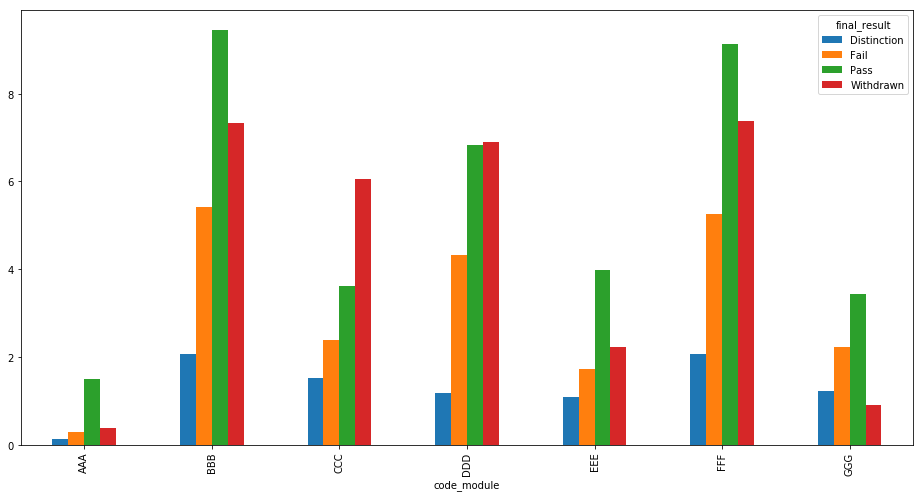

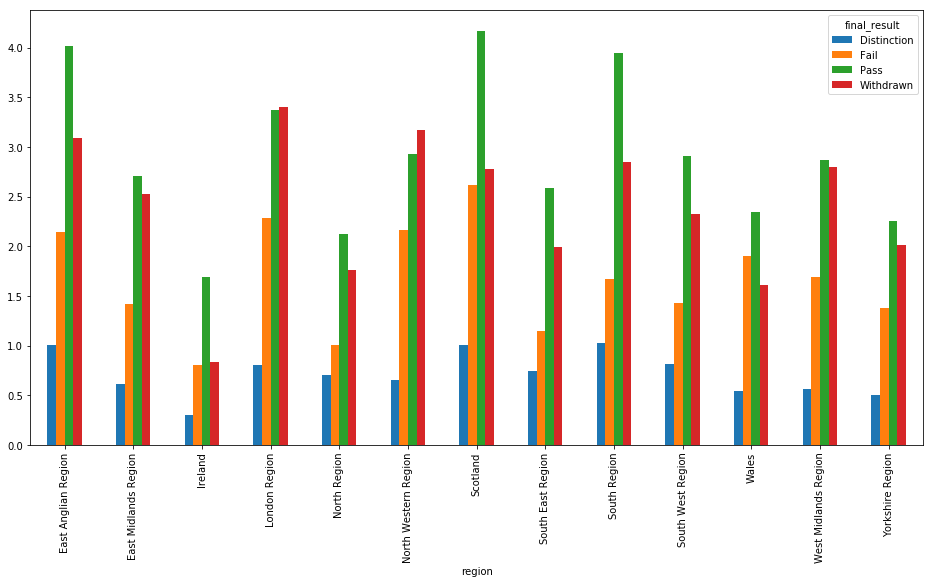

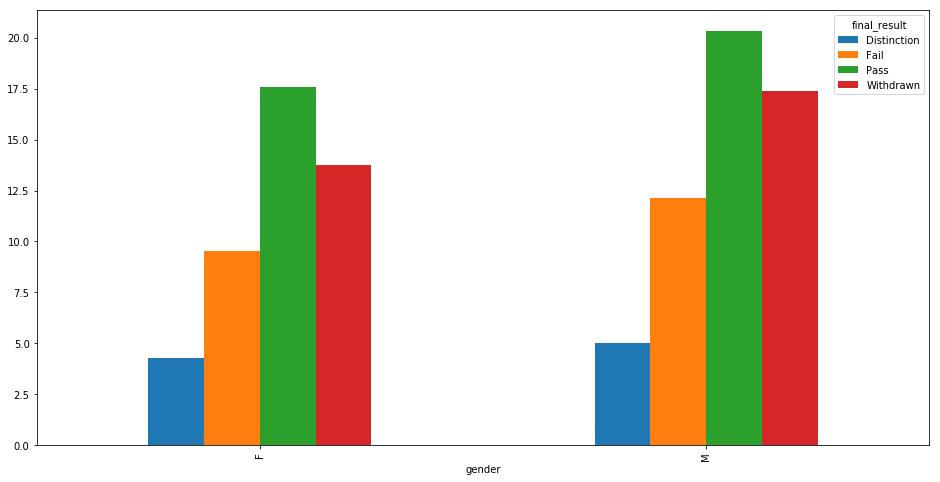

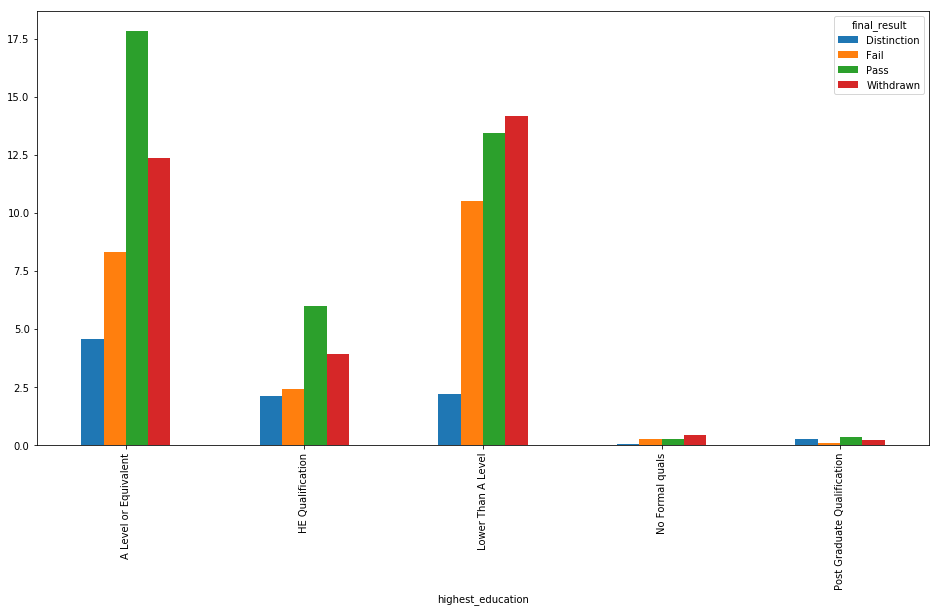

In [72]:
num_modules = courses.code_module.nunique()
num_presentations = courses.code_presentation.count()
num_students = student_info.id_student.nunique()
num_registrations = student_registration.id_student.count()
num_interactions = student_vle.id_site.count()
num_vles = vle.id_site.count()

print ("Summary")
print ("{0} modules are being offered in {1} presentations ({2} presentations per module)"
       .format(num_modules, num_presentations, round(num_presentations / num_modules, 2)))
print ("{0} registrations from {1} students ({2} registrations per student)"
       .format(num_registrations, num_students, round(num_registrations / num_students, 2)))
print ("{0} VLE engagements per student per course in a day with {1} VLEs ({2} interactions per VLE)"
       .format(num_interactions, num_vles, round(num_interactions / num_vles, 2)))

# Visualize pass, fail and withdrawn percentages
%matplotlib inline
visualization_fields = ['code_module', 'region', 'gender', 'highest_education']
for field in visualization_fields:
    pd.crosstab(student_info[field], student_info['final_result']).apply(lambda r: (r / len(student_info)) * 100,
                                                                         axis=1).plot.bar(figsize=(16, 8))

In [78]:
table2['final']= np.where(table2['final_result']=='Withdrawn', 1, 0)

In [79]:
table2

,id_student,final_result,sum_click,final
0,65002,Withdrawn,1408,1
1,65002,Fail,1408,0
2,94961,Withdrawn,14880,1
3,94961,Pass,14880,0
4,106247,Withdrawn,1395,1
5,129955,Withdrawn,45312,1
6,129955,Withdrawn,45312,1
7,135400,Withdrawn,8540,1
8,135400,Pass,8540,0
9,141377,Withdrawn,9072,1


In [81]:
table2['final'].value_counts()

1    5295
0    1460
Name: final, dtype: int64

In [82]:
table3=table2.groupby('id_student').max()

In [83]:
table3

,final_result,sum_click,final
id_student,,,
8462,Withdrawn,18368,1
24213,Withdrawn,27888,1
25261,Withdrawn,997,1
25572,Withdrawn,226,1
25997,Withdrawn,26,1
27417,Withdrawn,16320,1
27891,Withdrawn,8352,1
28952,Withdrawn,210,1
29411,Withdrawn,21060,1


In [84]:
check=table3['final']==0

In [85]:
table3[check]

,final_result,sum_click,final
id_student,,,
403052,Fail,15560,0
554243,Fail,11178,0


In [ ]:
%matplotlib inline
visualization_fields = ['code_module', 'region', 'gender', 'highest_education']
for field in visualization_fields:
    pd.crosstab(student_info[field], student_info['final_result']).apply(lambda r: (r / len(student_info)) * 100,
                                                                         axis=1).plot.bar(figsize=(16, 8))